## Importing all dependencies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)
# I took this approach from another notebook, because I found it really helpful
# to minimize the work. Anyway, we are supposed to do same preprocessing
# for both train and test datasets.

/home/yersss/.local/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


# Exploratory Data Analysis

In [4]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [5]:
df.var()

Age               207.748787
Fare             2678.959738
Parch               0.749195
PassengerId    142899.166667
Pclass              0.701969
SibSp               1.085052
Survived            0.236772
dtype: float64

In [6]:
df.isnull().any()

Age             True
Cabin           True
Embarked        True
Fare            True
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived        True
Ticket         False
dtype: bool

## handling null values

In [7]:
df = df.fillna(np.nan)

## handling with nan values of Fare

In [8]:
df[df['Fare'].isnull()==True].index

Int64Index([1043], dtype='int64')

In [9]:
nan_class = df['Pclass'].iloc[1043]
indexes = df[df['Pclass'] == nan_class].index

In [12]:
df['Fare'].iloc[1043] = np.mean(df['Fare'].iloc[indexes])

/home/yersss/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [13]:
df['Fare'].iloc[1043]

13.302888700564969

In [14]:
df["Fare"] = df["Fare"].map(lambda x: np.log(x) if x > 0 else 0)

## handling with nan values of Embarked

/home/yersss/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/yersss/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/yersss/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


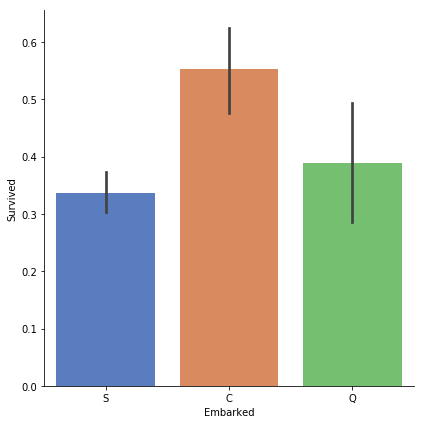

In [15]:
g = sns.factorplot(x="Embarked", y="Survived",  data=df,
                   size=6, kind="bar", palette="muted")

In [16]:
df['Embarked'].isnull().sum()

2

In [17]:
df[df['Embarked'].isnull()].index

Int64Index([61, 829], dtype='int64')

In [18]:
print(df['Survived'].iloc[61])
print(df['Survived'].iloc[829])

1.0
1.0


In [19]:
df["Embarked"] = df["Embarked"].fillna('C')

## Working with Name column

In [20]:
for i in range(len(df)):
    df['Name'].iloc[i] = df['Name'].iloc[i][df['Name'].iloc[i].find(',') + 2:df['Name'].iloc[i].find('.')]

/home/yersss/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## handling with null values of Age column

In [21]:
ind_age = df[df['Age'].isnull() == True]['Name'].index

In [22]:
for i in ind_age.values:
    status = df['Name'].iloc[i]
    ind = df[df['Name'] == status].index
    df['Age'].iloc[i] = np.mean(df['Age'].iloc[ind])

/home/yersss/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## Working with Sex column

In [23]:
df['Sex'] = np.where(df['Sex']=='male', 0, 1)

## Working with Cabin column

In [24]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
df['Cabin'] = df['Cabin'].fillna('T')

In [26]:
for i in range(len(df)):
    df['Cabin'].iloc[i] = df['Cabin'].iloc[i][0]

/home/yersss/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
df['Cabin'].unique()

array(['T', 'C', 'E', 'G', 'D', 'A', 'B', 'F'], dtype=object)

## Workign with Categorical Features

In [28]:
df = pd.get_dummies(df, columns = ['Name'])
df = pd.get_dummies(df, columns = ['Embarked'])
df = pd.get_dummies(df, columns = ['Cabin'])

In [29]:
df.columns

Index(['Age', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Ticket', 'Name_Capt', 'Name_Col', 'Name_Don', 'Name_Dona',
       'Name_Dr', 'Name_Jonkheer', 'Name_Lady', 'Name_Major', 'Name_Master',
       'Name_Miss', 'Name_Mlle', 'Name_Mme', 'Name_Mr', 'Name_Mrs', 'Name_Ms',
       'Name_Rev', 'Name_Sir', 'Name_the Countess', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_T'],
      dtype='object')

## Dropping Ticket column

In [ ]:
df['Ticket'].unique()

In [30]:
df.drop(labels = ['Ticket'], axis = 1, inplace = True)

In [31]:
df.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Name_Capt,Name_Col,...,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,22.0,1.981001,0,1,3,0,1,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,2,1,1,1,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,26.0,2.070022,0,3,3,1,0,1.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,4,1,1,1,1.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,35.0,2.085672,0,5,3,0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,1


## Splitting the data into train and test

In [32]:
train = df[:len(df_train)]
test = df[len(df_train):]

In [33]:
test.drop('Survived',axis = 1,inplace=True)

/home/yersss/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
target = train["Survived"]
inputs = train.drop(labels = ['Survived', 'PassengerId'],axis = 1)

In [35]:
input_test = test.drop(labels = ['PassengerId'], axis=1)

## Scaling the numeric features

In [36]:
sc = StandardScaler()

In [37]:
inputs = sc.fit_transform(inputs)
input_test = sc.transform(input_test)

In [38]:
input_test

array([[ 0.35671133, -0.83403761, -0.47367361, ..., -0.12168146,
        -0.06715343,  0.54319254],
       [ 1.29858564, -0.94572689, -0.47367361, ..., -0.12168146,
        -0.06715343,  0.54319254],
       [ 2.42883482, -0.6215579 , -0.47367361, ..., -0.12168146,
        -0.06715343,  0.54319254],
       ...,
       [ 0.65811111, -0.91071735, -0.47367361, ..., -0.12168146,
        -0.06715343,  0.54319254],
       [ 0.18733606, -0.80629067, -0.47367361, ..., -0.12168146,
        -0.06715343,  0.54319254],
       [-1.82974505,  0.21285416,  0.76762988, ..., -0.12168146,
        -0.06715343,  0.54319254]])

## XGBoost model

In [39]:
clf1 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=2500,
 max_depth=3,
 min_child_weight=2,
 subsample=0.8,
 colsample_bytree=0.5,
 nthread=3,
 scale_pos_weight=1,
 seed=30)

In [58]:
clf1.fit(inputs, target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=2, missing=None, n_estimators=2500,
       n_jobs=1, nthread=3, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30, silent=True,
       subsample=0.8)

In [60]:
print('Training accuracy...', accuracy_score(target, clf1.predict(inputs)))

Training accuracy... 0.9001122334455668


In [61]:
preds = clf1.predict(input_test)

In [62]:
preds

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

## Preparing for submission

In [63]:
test['Survived'] = preds

In [64]:
test.head(10)

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Name_Capt,Name_Col,Name_Don,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Survived
891,34.5,2.057860,0,892,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
892,47.0,1.945910,0,893,3,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
893,62.0,2.270836,0,894,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
894,27.0,2.159003,0,895,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
895,22.0,2.508582,1,896,3,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
896,14.0,2.221917,0,897,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
897,30.0,2.031983,0,898,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
898,26.0,3.367296,1,899,2,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0
899,18.0,1.978128,0,900,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
900,21.0,3.184284,0,901,3,0,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0.0


In [65]:
cols = ['PassengerId', 'Survived']
submission = test[cols]

In [66]:
submission['Survived'] = submission['Survived'].astype(int)

In [67]:
submission.to_csv('Xgb.csv', index = False)